## Credit Card Balance

In [1]:
import pandas as pd
import numpy as np

import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
save_files = True

In [3]:
# load credit card file
df_card = pd.read_csv('input/credit_card_balance.csv')
df_card.info()
df_card.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [4]:
df_card[df_card.SK_ID_PREV==2562384].sort_values(by='MONTHS_BALANCE').head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1811769,2562384,378907,-48,69186.690,270000,67500.0,67500.0,0.0,0.0,NaN,...,67841.190,67841.190,1.0,1,0.0,0.0,NaN,Active,0,0
2584127,2562384,378907,-47,62727.075,270000,0.0,0.0,0.0,0.0,3498.975,...,63246.825,63246.825,0.0,0,0.0,0.0,1.0,Active,0,0
3284876,2562384,378907,-46,62577.900,270000,0.0,0.0,0.0,0.0,3399.795,...,63082.080,63082.080,0.0,0,0.0,0.0,2.0,Active,0,0
2653597,2562384,378907,-45,61484.400,270000,0.0,0.0,0.0,0.0,3346.695,...,61980.255,61980.255,0.0,0,0.0,0.0,3.0,Active,0,0
1039133,2562384,378907,-44,60736.680,270000,0.0,0.0,0.0,0.0,3291.390,...,61224.345,61224.345,0.0,0,0.0,0.0,4.0,Active,0,0
2021610,2562384,378907,-43,59786.865,270000,0.0,0.0,0.0,0.0,3242.250,...,60267.735,60267.735,0.0,0,0.0,0.0,5.0,Active,0,0
1764744,2562384,378907,-42,58743.675,270000,0.0,0.0,0.0,0.0,3194.190,...,59216.985,59216.985,0.0,0,0.0,0.0,6.0,Active,0,0
2239489,2562384,378907,-41,57725.595,270000,0.0,0.0,0.0,0.0,3141.450,...,58191.525,58191.525,0.0,0,0.0,0.0,7.0,Active,0,0
2648695,2562384,378907,-40,51462.360,270000,0.0,0.0,0.0,0.0,3089.925,...,51920.145,51920.145,0.0,0,0.0,0.0,8.0,Active,0,0
561468,2562384,378907,-39,56570.940,270000,0.0,0.0,0.0,0.0,2761.740,...,56570.940,56570.940,0.0,0,0.0,0.0,9.0,Active,6,6


In [5]:
# relationship between SK_ID_PREV and SK_ID_CURR
id_prev_curr = df_card.groupby('SK_ID_PREV').SK_ID_CURR.first()
display(id_prev_curr.head(5))

# drop SK_ID_CURR from df_card
df_card.drop('SK_ID_CURR',axis=1,inplace=True)

SK_ID_PREV
1000018    394447
1000030    361282
1000031    131335
1000035    436351
1000077    181153
Name: SK_ID_CURR, dtype: int64

In [6]:
# one categorical variable: NAME_CONTRACT_STATUS
df_card.NAME_CONTRACT_STATUS.value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [7]:
status = df_card.groupby('SK_ID_PREV').NAME_CONTRACT_STATUS.value_counts().unstack(fill_value=0)
status[status.Refused==1]

NAME_CONTRACT_STATUS,Active,Approved,Completed,Demand,Refused,Sent proposal,Signed
SK_ID_PREV,,,,,,,
1030684,71,0,0,0,1,0,0
1195453,47,0,33,0,1,0,0
1207737,82,0,0,0,1,0,0
1211141,84,0,1,0,1,0,2
1282349,63,0,25,0,1,0,0
1295364,77,0,0,0,1,0,0
1683305,81,0,0,0,1,0,0
1910523,90,0,0,0,1,0,0
1920939,95,0,0,0,1,0,0


In [8]:
df_card[df_card.SK_ID_PREV==1211141].sort_values(by='MONTHS_BALANCE')[['MONTHS_BALANCE','NAME_CONTRACT_STATUS','AMT_BALANCE']].head(10)

,MONTHS_BALANCE,NAME_CONTRACT_STATUS,AMT_BALANCE
1586866,-89,Refused,0.000
2584855,-88,Signed,91912.185
1114624,-87,Signed,90192.960
2805633,-86,Active,88397.280
2334821,-85,Active,86610.465
1043448,-84,Active,84787.335
2804266,-83,Active,82896.840
601800,-82,Active,81015.885
1741554,-81,Active,79072.560
1975568,-80,Active,77133.015


In [9]:
df_card[(df_card.SK_ID_PREV==1211141)].sort_values(by='MONTHS_BALANCE').head(10).T

,1586866,2584855,1114624,2805633,2334821,1043448,2804266,601800,1741554,1975568
SK_ID_PREV,1211141,1211141,1211141,1211141,1211141,1211141,1211141,1211141,1211141,1211141
MONTHS_BALANCE,-89,-88,-87,-86,-85,-84,-83,-82,-81,-80
AMT_BALANCE,0,91912.2,90193,88397.3,86610.5,84787.3,82896.8,81015.9,79072.6,77133
AMT_CREDIT_LIMIT_ACTUAL,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000
AMT_DRAWINGS_ATM_CURRENT,NaN,90000,0,0,0,0,0,0,0,0
AMT_DRAWINGS_CURRENT,0,90000,0,0,0,0,0,0,0,0
AMT_DRAWINGS_OTHER_CURRENT,NaN,0,0,0,0,0,0,0,0,0
AMT_DRAWINGS_POS_CURRENT,NaN,0,0,0,0,0,0,0,0,0
AMT_INST_MIN_REGULARITY,NaN,NaN,4500,4500,4500,4500,4500,4500,4500,4500
AMT_PAYMENT_CURRENT,0,0,4500,4500,4500,4500,4500,4500,4500,4500


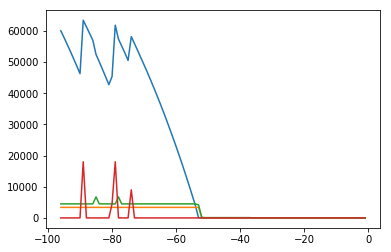

In [10]:
tmp=df_card[df_card.SK_ID_PREV==1468118].sort_values(by='MONTHS_BALANCE')
plt.plot(tmp.MONTHS_BALANCE,tmp.AMT_BALANCE)
plt.plot(tmp.MONTHS_BALANCE,tmp.AMT_INST_MIN_REGULARITY)
plt.plot(tmp.MONTHS_BALANCE,tmp.AMT_PAYMENT_CURRENT)
plt.plot(tmp.MONTHS_BALANCE,tmp.AMT_DRAWINGS_CURRENT)


tmp['my_diff'] = tmp.AMT_DRAWINGS_CURRENT+tmp.AMT_INST_MIN_REGULARITY-tmp.AMT_PAYMENT_TOTAL_CURRENT
tmp['balance_diff'] = tmp.AMT_BALANCE.diff()

tmp[['AMT_PAYMENT_TOTAL_CURRENT','AMT_INST_MIN_REGULARITY','AMT_DRAWINGS_CURRENT',
     'AMT_BALANCE','balance_diff','NAME_CONTRACT_STATUS']].head(10)

del tmp

In [11]:
df_card['PAYMENT_DIFF'] = df_card.AMT_INST_MIN_REGULARITY - df_card.AMT_PAYMENT_TOTAL_CURRENT

In [12]:
df_card = df_card.sort_values(by=['SK_ID_PREV','MONTHS_BALANCE']).reset_index(drop=True)

df_card = pd.get_dummies(df_card)

In [13]:
df_card.rename(columns={'MONTHS_BALANCE':'MONTH',
                        'AMT_BALANCE':'BALANCE',
                        'AMT_CREDIT_LIMIT_ACTUAL':'LIMIT',
                        'AMT_DRAWINGS_ATM_CURRENT':'AMT_ATM',
                        'AMT_DRAWINGS_CURRENT':'AMT_DRAW',
                        'AMT_DRAWINGS_OTHER_CURRENT':'AMT_OTHER',
                        'AMT_DRAWINGS_POS_CURRENT':'AMT_POS',
                        'AMT_INST_MIN_REGULARITY':'MIN_INST',
                        'AMT_PAYMENT_CURRENT':'PAID',
                        'AMT_PAYMENT_TOTAL_CURRENT':'PAID_TOT',
                        'AMT_RECEIVABLE_PRINCIPAL':'PRINC',
                        'AMT_RECIVABLE':'RECIV',
                        'AMT_TOTAL_RECEIVABLE':'RECIV_TOT',
                        'CNT_DRAWINGS_ATM_CURRENT':'CNT_ATM',
                        'CNT_DRAWINGS_CURRENT':'CNT_DRAW',
                        'CNT_DRAWINGS_OTHER_CURRENT':'CNT_OTHER',
                        'CNT_DRAWINGS_POS_CURRENT':'CNT_POS',
                        'CNT_INSTALMENT_MATURE_CUM':'CNT_INST',
                        'NAME_CONTRACT_STATUS_Active':'STAT_Active',
                        'NAME_CONTRACT_STATUS_Approved':'STAT_Appr',
                        'NAME_CONTRACT_STATUS_Completed':'STAT_Compl',
                        'NAME_CONTRACT_STATUS_Demand':'STAT_Deman',
                        'NAME_CONTRACT_STATUS_Refused':'STAT_Refu',
                        'NAME_CONTRACT_STATUS_Sent proposal':'STAT_Sent',
                        'NAME_CONTRACT_STATUS_Signed':'STAT_Sign'},
               inplace=True)

df_card.head()

,SK_ID_PREV,MONTH,BALANCE,LIMIT,AMT_ATM,AMT_DRAW,AMT_OTHER,AMT_POS,MIN_INST,PAID,...,SK_DPD,SK_DPD_DEF,PAYMENT_DIFF,STAT_Active,STAT_Appr,STAT_Compl,STAT_Deman,STAT_Refu,STAT_Sent,STAT_Sign
0,1000018,-6,38879.145,45000,13500.0,51042.645,0.0,37542.645,0.00,9000.000,...,0,0,-9000.000,1,0,0,0,0,0,0
1,1000018,-5,40934.070,45000,0.0,2335.500,0.0,2335.500,2250.00,3900.870,...,0,0,-1650.870,1,0,0,0,0,0,0
2,1000018,-4,44360.505,45000,0.0,2032.560,0.0,2032.560,2250.00,3646.710,...,0,0,-1396.710,1,0,0,0,0,0,0
3,1000018,-3,113862.285,135000,13500.0,69156.945,0.0,55656.945,2263.77,3190.635,...,0,0,-926.865,1,0,0,0,0,0,0
4,1000018,-2,136695.420,135000,0.0,22827.330,0.0,22827.330,6206.67,7970.535,...,0,0,-1763.865,1,0,0,0,0,0,0


In [14]:
card_grouped = df_card.groupby('SK_ID_PREV').agg(['first','last','mean','max','min'])

card_grouped.columns = ['CC_'+'_'.join(x) for x in card_grouped.columns.values]

del df_card

card_grouped.head()

,CC_MONTH_first,CC_MONTH_last,CC_MONTH_mean,CC_MONTH_max,CC_MONTH_min,CC_BALANCE_first,CC_BALANCE_last,CC_BALANCE_mean,CC_BALANCE_max,CC_BALANCE_min,...,CC_STAT_Sent_first,CC_STAT_Sent_last,CC_STAT_Sent_mean,CC_STAT_Sent_max,CC_STAT_Sent_min,CC_STAT_Sign_first,CC_STAT_Sign_last,CC_STAT_Sign_mean,CC_STAT_Sign_max,CC_STAT_Sign_min
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
1000018,-6,-2,-4.0,-2,-6,38879.145,136695.420,74946.285000,136695.420,38879.145,...,0,0,0.0,0,0,0,0,0.0,0,0
1000030,-8,-1,-4.5,-1,-8,0.000,103027.275,55991.064375,103027.275,0.000,...,0,0,0.0,0,0,0,0,0.0,0,0
1000031,-16,-1,-8.5,-1,-16,0.000,135786.690,52394.439375,154945.935,0.000,...,0,0,0.0,0,0,0,0,0.0,0,0
1000035,-6,-2,-4.0,-2,-6,0.000,0.000,0.000000,0.000,0.000,...,0,0,0.0,0,0,0,0,0.0,0,0
1000077,-12,-2,-7.0,-2,-12,0.000,0.000,0.000000,0.000,0.000,...,0,0,0.0,0,0,0,0,0.0,0,0


In [15]:
drop_cols = card_grouped.sum()[card_grouped.abs().sum()==0].index.tolist()
print(drop_cols)

card_grouped.drop(drop_cols,axis=1,inplace=True)

['CC_STAT_Appr_last', 'CC_STAT_Appr_min', 'CC_STAT_Refu_last', 'CC_STAT_Refu_min', 'CC_STAT_Sent_last', 'CC_STAT_Sent_min']


In [16]:
card_grouped['SK_ID_CURR'] = id_prev_curr

cc_idcurr = card_grouped.groupby('SK_ID_CURR').agg(['min','max','sum','mean'])
cc_idcurr['CC_count'] = card_grouped.SK_ID_CURR.value_counts()

cc_idcurr.columns = ['_'.join(x) for x in cc_idcurr.columns.values]
cc_cols = cc_idcurr.columns

del card_grouped

cc_idcurr.head()

,CC_MONTH_first_min,CC_MONTH_first_max,CC_MONTH_first_sum,CC_MONTH_first_mean,CC_MONTH_last_min,CC_MONTH_last_max,CC_MONTH_last_sum,CC_MONTH_last_mean,CC_MONTH_mean_min,CC_MONTH_mean_max,...,CC_STAT_Sign_mean_mean,CC_STAT_Sign_max_min,CC_STAT_Sign_max_max,CC_STAT_Sign_max_sum,CC_STAT_Sign_max_mean,CC_STAT_Sign_min_min,CC_STAT_Sign_min_max,CC_STAT_Sign_min_sum,CC_STAT_Sign_min_mean,CC_count_
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,-6,-6,-6,-6.0,-1,-1,-1,-1,-3.5,-3.5,...,0.0,0,0,0,0.0,0,0,0,0.0,1
100011,-75,-75,-75,-75.0,-2,-2,-2,-2,-38.5,-38.5,...,0.0,0,0,0,0.0,0,0,0,0.0,1
100013,-96,-96,-96,-96.0,-1,-1,-1,-1,-48.5,-48.5,...,0.0,0,0,0,0.0,0,0,0,0.0,1
100021,-18,-18,-18,-18.0,-2,-2,-2,-2,-10.0,-10.0,...,0.0,0,0,0,0.0,0,0,0,0.0,1
100023,-11,-11,-11,-11.0,-4,-4,-4,-4,-7.5,-7.5,...,0.0,0,0,0,0.0,0,0,0,0.0,1


In [17]:
print('loading train...')
df_train = pd.read_csv('input/application_train.csv',index_col='SK_ID_CURR')

print('merging train...')
df_train = df_train.merge(cc_idcurr,how='left',left_index=True,right_index=True)

if save_files:
    print('saving train...')
    df_train[cc_cols].to_csv('input/app_train_ALL_cc.csv')
    
    print('loading test...')
    df_test = pd.read_csv('input/application_test.csv',index_col='SK_ID_CURR')

    print('merging test...')
    df_test = df_test.merge(cc_idcurr,how='left',left_index=True,right_index=True)

    
    print('saving test...')
    df_test[cc_cols].to_csv('input/app_test_ALL_cc.csv')
    
del cc_idcurr

display(df_train.head())

print('Done!')

loading train...
merging train...


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_STAT_Sign_mean_mean,CC_STAT_Sign_max_min,CC_STAT_Sign_max_max,CC_STAT_Sign_max_sum,CC_STAT_Sign_max_mean,CC_STAT_Sign_min_min,CC_STAT_Sign_min_max,CC_STAT_Sign_min_sum,CC_STAT_Sign_min_mean,CC_count_
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


saving train...
loading test...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(39), object(16)
memory usage: 45.0+ MB
merging test...
saving test...
Done!


## model

In [18]:
def plot_roc_curve(y_true, y_pred, color='darkorange',plot_random=True,label='ROC curve'):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    score = roc_auc_score(y_true, y_pred)
    
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=label+' (area = %0.2f)' % score)
    
    if plot_random:
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
target_counts = df_train.TARGET.value_counts()
targ1_weight = target_counts[0]/target_counts[1]
weights = df_train.TARGET.replace({0:1, 1:targ1_weight}).values

dtypes = df_train.dtypes
cols_categ = dtypes[dtypes=='object'].index.tolist()
for col in cols_categ:
    df_train[col] = df_train[col].astype('category')
    
y_true = df_train.TARGET
X = df_train.drop('TARGET',axis=1)
train_data = lgb.Dataset(X, label=y_true, weight=weights)

    
# train
param = {'objective':'binary', 'metric':'auc'}
bst = lgb.train(param, train_data)

#plot roc curve
plt.figure()
plot_roc_curve(y_true, bst.predict(X))

LightGBMError: b'bad allocation'

In [ ]:
plt.figure(figsize=(10,30))

feat_imp = pd.DataFrame({'split':bst.feature_importance(importance_type='split'),
                         'gain':bst.feature_importance(importance_type='gain')},
                        index=bst.feature_name())

total_gain = feat_imp['gain'].sum()
frac_gain = feat_imp['gain']/total_gain
frac_gain = frac_gain.sort_values(ascending=False)

display(frac_gain.head(30))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(len(frac_gain))+1, frac_gain)
plt.xlabel('n_features')
plt.ylabel('frac gain')

plt.subplot(1,2,2)
plt.plot(np.arange(len(frac_gain))+1,frac_gain.cumsum())
plt.xlabel('n_features')
plt.ylabel('cumulative frac gain')

In [ ]:
# select top n columns from cc by importance
n_cols = 60
select_cols = frac_gain[frac_gain.index.str.contains('CC_')].index[:n_cols]

if save_files:
    df_train[select_cols].to_csv('input/app_train_SELECT_cc.csv')
    df_test[select_cols].to_csv('input/app_test_SELECT_cc.csv')